# Webtask Demo: E-commerce Shopping Cart

This notebook demonstrates automated web interaction using Webtask to add items to a shopping cart.

## 1. Setup

Install dependencies and import required libraries.

In [1]:
!pip install -e .. 

Obtaining file:///home/stevewang/Github/web-auto

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
ERROR: file:///home/stevewang/Github/web-auto does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.


In [2]:
from dotenv import load_dotenv
from IPython.display import Image, display

# Load environment variables from .env file
load_dotenv()

True

## 2. Initialize Webtask Agent

Create a Webtask instance and configure the LLM.

In [3]:
from webtask import Webtask
from webtask.integrations.llm.google import GeminiLLM

wt = Webtask()
# GeminiLLM will automatically read GOOGLE_API_KEY from environment
llm = GeminiLLM.create(model="gemini-2.5-flash", temperature=0.5)

/home/stevewang/Github/web-auto/webtask/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
# Create agent
agent = await wt.create_agent(llm=llm)

## 3. Initial State

Navigate to the website and capture the starting state.

Screenshot BEFORE task execution:


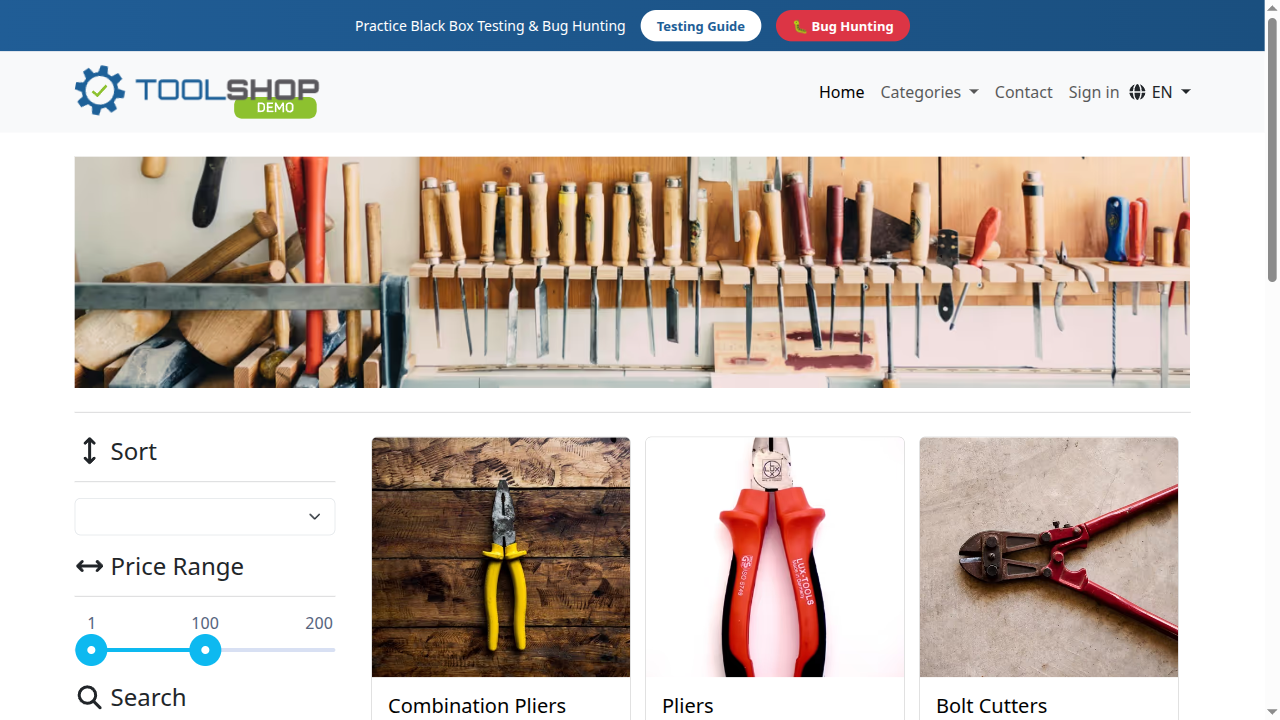

In [5]:
# Navigate to the starting page first
await agent.navigate("https://practicesoftwaretesting.com/")
await agent.wait(5)

# Take screenshot before starting the task
print("Screenshot BEFORE task execution:")
await agent.screenshot("before_task.png")
display(Image(filename="before_task.png", width=800))

## 4. Execute Task

Run the agent autonomously to add items to the shopping cart and print the complete result.

In [6]:
# Execute the task autonomously
result = await agent.execute(
    "add 2 Flat-Head Wood Screws and 5 cross-head screws to the cart, and verify at the cart page",
)

# Print the complete task result
print(result)

2025-11-18 16:42:36 - webtask._internal.agent.worker.worker - INFO - Worker session start - Task: add 2 Flat-Head Wood Screws and 5 cross-head screws to the cart, and verify at the cart page
2025-11-18 16:42:36 - webtask._internal.agent.worker.worker - INFO - Step 1 - Start
2025-11-18 16:42:36 - webtask._internal.agent.worker.worker - DEBUG - Sending LLM request...
2025-11-18 16:42:38 - webtask.llm.llm - INFO - Token usage - Prompt: 4214, Response: 69, Total: 4347
2025-11-18 16:42:38 - webtask._internal.agent.worker.worker - INFO - Received LLM response - Tools: ['type', 'click', 'wait']
2025-11-18 16:42:38 - webtask._internal.agent.tool - INFO - Executing tool: type with params: {'text': 'Flat-Head Wood Screws', 'description': 'Search textbox', 'element_id': 'textbox-0'}
2025-11-18 16:42:38 - webtask._internal.agent.tool - INFO - Tool executed successfully: Typed 'Flat-Head Wood Screws' into Search textbox
2025-11-18 16:42:38 - webtask._internal.agent.tool - INFO - Executing tool: cli

In [7]:
print(result.status)

TaskStatus.COMPLETE


## 5. Final State

Capture the final state after task completion.

Screenshot AFTER task execution:


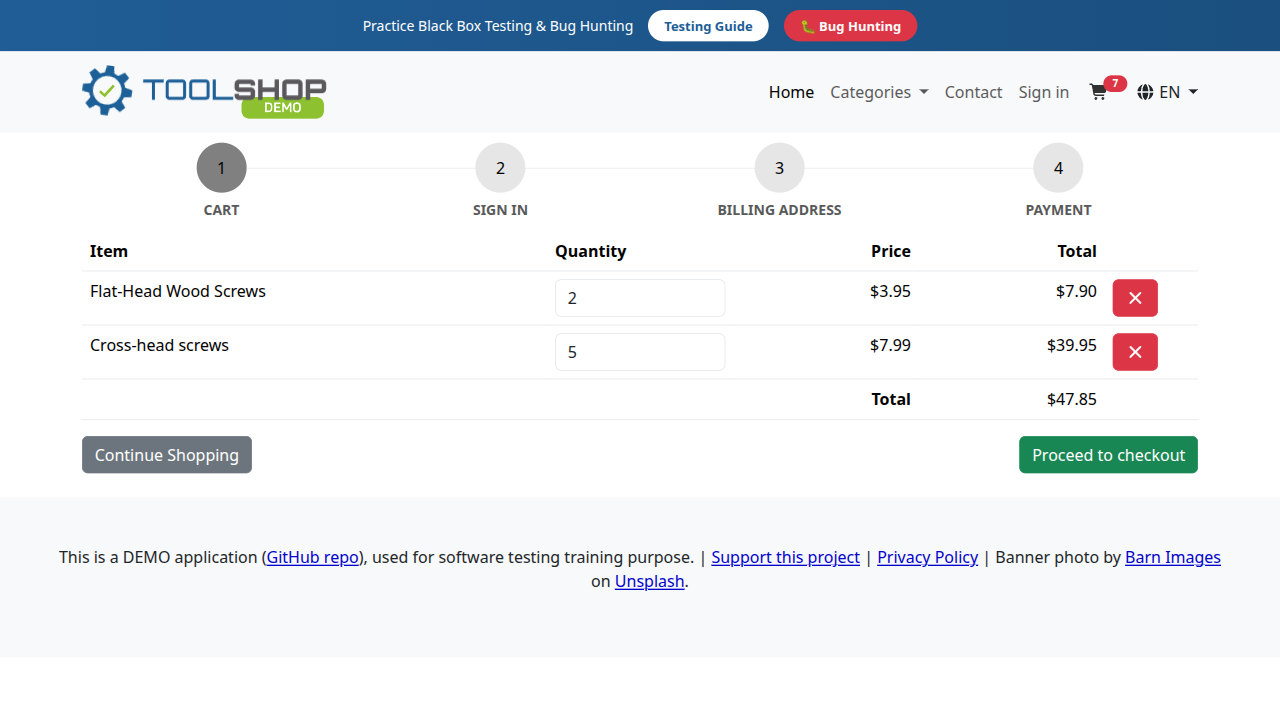

In [8]:
# Take screenshot after task completion
print("Screenshot AFTER task execution:")
await agent.screenshot("after_task.png")
display(Image(filename="after_task.png", width=800))